In [80]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',30) #to see all the columns

In [114]:
# read the data
train = pd.read_csv("PA1_train.csv")
dev = pd.read_csv("PA1_dev.csv")
test = pd.read_csv("PA1_test.csv")

In [115]:
# Removing the ID feature :
train.drop('id',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)
dev.drop('id',axis=1,inplace=True)

In [116]:
# split date to month day and year
for i in [train,test,dev]:
    i['month'] = i.date.map(lambda x : int(x.split('/')[0]))
    i['day'] = i.date.map(lambda x : int(x.split('/')[1]))
    i['year'] = i.date.map(lambda x : int(x.split('/')[2]))
    i.drop('date',axis=1,inplace=True)

In [117]:
# based on heat map, highly correlated feature can be select one among them but 
# we will see the performance of model with all model (with one by one drop of each feature)

In [200]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# X and Y
Y_train=train['price']
X_train=train.loc[:,~train.columns.isin(['price','dummy'])]
X_train['yr_dif']=X_train['year']-X_train['yr_built']

X_dev=dev.loc[:,~dev.columns.isin(['price','dummy'])]
X_dev['yr_dif']=X_dev['year']-X_dev['yr_built']
Y_dev=dev['price']

# drop features
# drop_list=['day','month','year','sqft_living15','sqft_lot15','zipcode']
# X_train=X_train.drop(drop_list,axis=1)
# X_dev=X_dev.drop(drop_list,axis=1)

# reg=LinearRegression()
reg=linear_model.Ridge(alpha=0.5)
# reg=linear_model.Lasso(alpha=0.01)

result={}

# without individual drop of features
normalization=preprocessing.StandardScaler().fit(X_train.loc[:,~X_train.columns.isin(['dummy'])])
# normalization=preprocessing.MinMaxScaler().fit(X_train.loc[:,~X_train.columns.isin(['dummy'])])

X_train_norm=normalization.transform(X_train.loc[:,~X_train.columns.isin(['dummy'])])
X_dev_norm=normalization.transform(X_dev.loc[:,~X_dev.columns.isin(['dummy'])])
reg.fit(X_train_norm,np.log(Y_train))
result['None']=reg.score(X_dev_norm,np.log(Y_dev))
    
for i in X_train.columns[~X_train.columns.isin(['dummy'])]:
    # Normalization
    normalization=preprocessing.StandardScaler().fit(X_train.loc[:,~X_train.columns.isin(['dummy',i])])
    # normalizing train/dev
    X_train_norm=normalization.transform(X_train.loc[:,~X_train.columns.isin(['dummy',i])])
    X_dev_norm=normalization.transform(X_dev.loc[:,~X_dev.columns.isin(['dummy',i])])

    reg.fit(X_train_norm,np.log(Y_train))
    result[i]=reg.score(X_dev_norm,np.log(Y_dev))

result=pd.DataFrame(result,index=[0])

/home/satish/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/satish/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


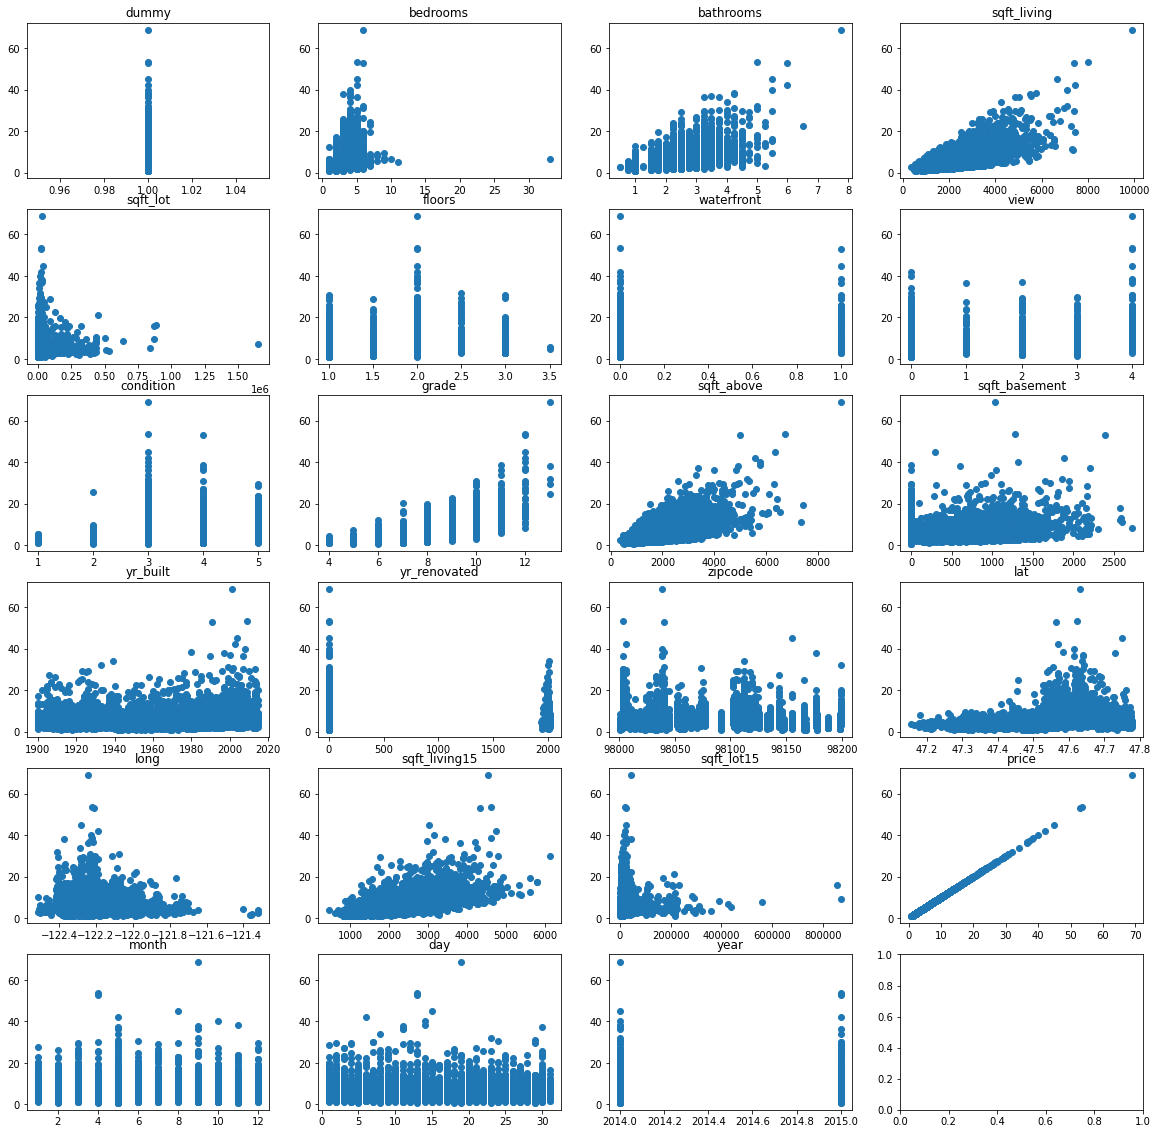

In [213]:
import math
fig,ax=plt.subplots(math.ceil(len(train.columns)/4),4,figsize=(20,20))
row=0
for i in train.columns:
    ax[row,col].scatter(train[i],train['price'])
    ax[row,col].set_title(i)
    col+=1
    if col==4:
        row+=1
        col=0
        
    

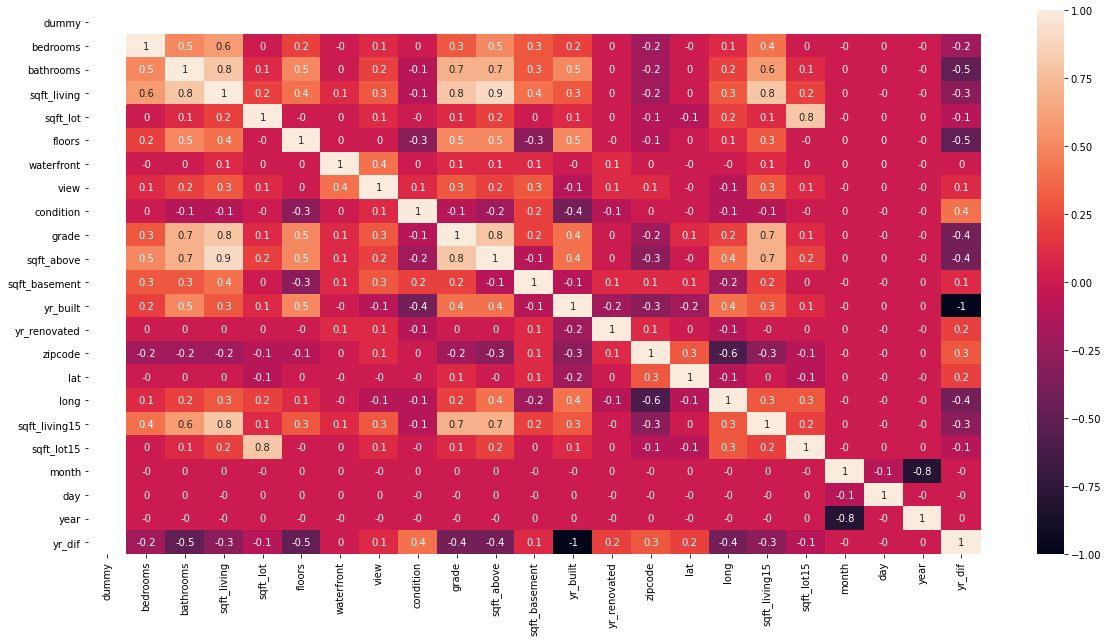

In [176]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(X_train.corr().round(1),annot=True, ax=ax)
# plt.figure(figsize=(10,10))